# Staistical Methods for Decision Making Project - By karthik Sreeram 

In [74]:
import numpy as np
import pandas as pd
import os
import seaborn as sns  
import matplotlib.patches as mpatches #customize graph and graph labels
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from   scipy.stats import ttest_1samp, ttest_ind ,chi2_contingency,chi2,shapiro,normaltest
import sweetviz as sv
df1=pd.read_csv("Wholesale+Customers+Data.csv")
df2=pd.read_csv("Survey.csv")
df3=pd.read_csv("A+&+B+shingles.csv")


# Problem 1

Problem 1 
1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

1.2. There are 6 different varieties of items are considered.
Do all varieties show similar behaviour across Region and Channel?

1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
Which items shows the least inconsistent behaviour?

1.4. Are there any outliers in the data?

1.5. On the basis of this report, what are the recommendations?

# 1.1. Use methods of descriptive statistics to summarize data.


In [2]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
report1 = sv.analyze(df1)
report1.show_html('report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
df1.size

3960

In [6]:
print ("Dataset has any na values ? " , df1.isnull().values.any())

Dataset has any na values ?  False


In [7]:
df1.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df1["Channel"].unique()

array(['Retail', 'Hotel'], dtype=object)

In [9]:
df1["Region"].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [10]:
bdf=df1.drop(columns=['Buyer/Spender'])
bdf.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [11]:
spent=bdf.groupby(["Region","Channel"]).sum()
spent

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Region Channel                
Lisbon Hotel           70632  
       Retail          33695  
Oporto Hotel           30965  
       Retail          23541  
Other  Hotel          320358  
       Retail         191752

In [12]:
spent["Total_Expenditure"]= spent.sum(axis=1)
spent

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  Total_Expenditure  
Region Channel                                   
Lisbon Hotel           70632            1538342  
       Retail          33695             848471  
Oporto Hotel           30965             719150  
       Retail          23541             835938  
Other  Hotel          320358            5742077  
       Retail         191752            4935522

## Which Region and which Channel seems to spend more?

In [13]:

spent['Total_Expenditure'].loc[(spent['Total_Expenditure']==max(spent['Total_Expenditure']))]

Region  Channel
Other   Hotel      5742077
Name: Total_Expenditure, dtype: int64

## Which Region and which Channel seems to spend less?

In [14]:
spent['Total_Expenditure'].loc[(spent['Total_Expenditure']==min(spent['Total_Expenditure']))]

Region  Channel
Oporto  Hotel      719150
Name: Total_Expenditure, dtype: int64

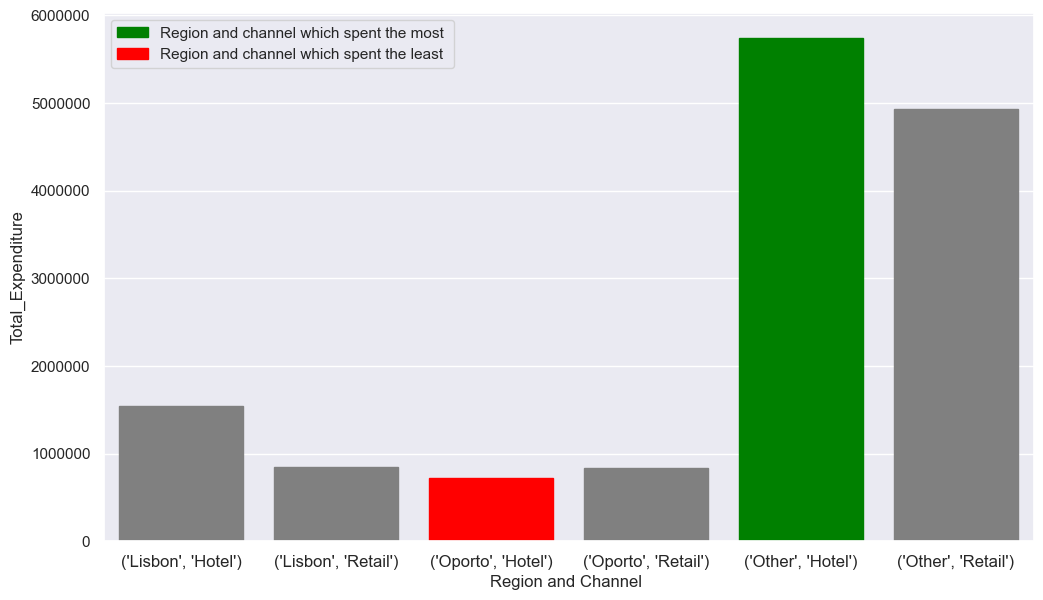

In [66]:
plt.figure(figsize=(12,7))
x=sns.barplot(x=spent.index,y='Total_Expenditure',data=spent)
for height in x.patches:
    if height.get_height() == max(spent['Total_Expenditure']) :
        height.set_color('green')
    elif height.get_height() == min(spent['Total_Expenditure']) :
          height.set_color('red') 
    else:
        height.set_color('grey')
plt.xlabel('Region and Channel ')
x.set_xticklabels(x.get_xmajorticklabels(), fontsize = 12)



green_patch = mpatches.Patch(color='green', label='Region and channel which spent the most ')
red_patch = mpatches.Patch(color='red', label='Region and channel which spent the least')

plt.legend(handles=[green_patch,red_patch])

### From the  above analysis we find out that the maximum amount of revenue for selling the products  is from the "Hotels "channel which belong to "Other" region  ie they spent the most .
### The Hotels from Opoto region  spent the least amount of money .

# 1.2 There are 6 different varieties of items are considered.Do all varieties show similar behaviour across Region and Channel?

In [16]:

behiviour=bdf.groupby(["Region","Channel"]).describe().T
behiviour

Region                        Lisbon                      Oporto  \
Channel                        Hotel        Retail         Hotel   
Fresh            count     59.000000     18.000000     28.000000   
                 mean   12902.254237   5200.000000  11650.535714   
                 std    12342.008901   5415.521495   8969.362752   
                 min      514.000000     18.000000      3.000000   
                 25%     4437.500000   2378.250000   4938.250000   
                 50%     8656.000000   2926.000000   9787.000000   
                 75%    18135.000000   5988.000000  17031.500000   
                 max    56083.000000  20782.000000  32717.000000   
Milk             count     59.000000     18.000000     28.000000   
                 mean    3870.203390  10784.000000   2304.250000   
                 std     4298.321195   6609.221463   2968.628697   
                 min      258.000000   2527.000000    333.000000   
                 25%     1071.000000   6253.250000   1146.000000   
                 50%     2280.000000   8866.000000   1560.500000   
                 75%     4995.500000  13112.250000   2344.750000   
                 max    23527.000000  28326.000000  16784.000000   
Grocery          count     59.000000     18.000000     28.000000   
                 mean    4026.135593  18471.944444   4395.500000   
                 std     3629.644143  10414.687844   3048.298815   
                 min      489.000000   5265.000000   1330.000000   
                 25%     1620.000000  10634.250000   2373.750000   
                 50%     2576.000000  16106.000000   3352.000000   
                 75%     5172.500000  23478.750000   5527.500000   
                 max    16966.000000  39694.000000  13626.000000   
Frozen           count     59.000000     18.000000     28.000000   
                 mean    3127.322034   2584.111111   5745.035714   
                 std     3276.460124   2424.774577  11454.478518   
                 min       91.000000     61.000000    264.000000   
                 25%      966.000000    923.500000    962.250000   
                 50%     1859.000000   1522.000000   2696.500000   
                 75%     4479.000000   3843.000000   4617.000000   
                 max    18711.000000   8321.000000  60869.000000   
Detergents_Paper count     59.000000     18.000000     28.000000   
                 mean     950.525424   8225.277778    482.714286   
                 std     1305.907616   5515.878798    425.310506   
                 min        5.000000    788.000000     15.000000   
                 25%      237.000000   4818.250000    182.750000   
                 50%      412.000000   6177.000000    325.000000   
                 75%      874.000000  11804.750000    707.000000   
                 max     5828.000000  19410.000000   1679.000000   
Delicatessen     count     59.000000     18.000000     28.000000   
                 mean    1197.152542   1871.944444   1105.892857   
                 std     1219.945304   1626.486667   1056.778800   
                 min        7.000000    120.000000     51.000000   
                 25%      374.000000    746.000000    567.250000   
                 50%      749.000000   1414.000000    883.000000   
                 75%     1621.500000   2456.500000   1146.000000   
                 max     6854.000000   6372.000000   5609.000000   

Region                                        Other                
Channel                       Retail          Hotel        Retail  
Fresh            count     19.000000     211.000000    105.000000  
                 mean    7289.789474   13878.052133   9831.504762  
                 std     6867.934548   14746.572913   9635.394129  
                 min      161.000000       3.000000     23.000000  
                 25%     2368.000000    3702.500000   2343.000000  
                 50%     6468.000000    9612.000000   7362.000000  
                 75%     9162.000000   18821.000000  15

In [17]:
bdf_melt = bdf.melt(id_vars = ['Channel','Region'],
                  value_vars = ['Fresh',
                                'Milk',
                                'Grocery',
                                'Frozen',
                                'Detergents_Paper',
                                'Delicatessen'],
                  var_name = 'columns')

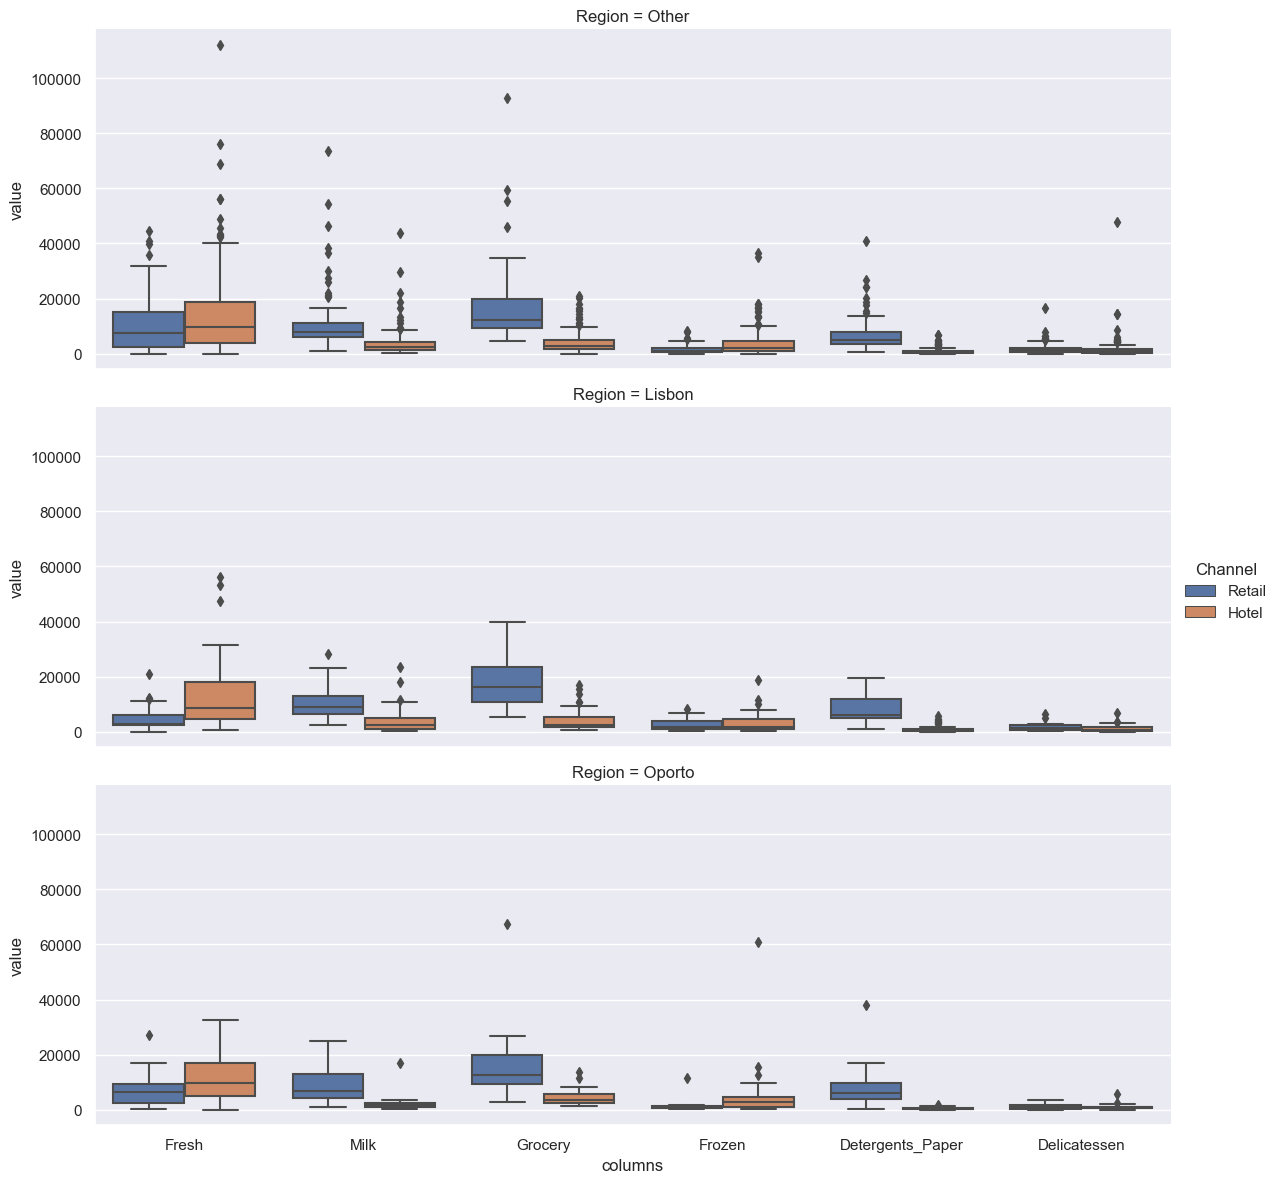

In [67]:

sns.catplot(x="columns",
               y = "value",
               hue="Channel", 
               row="Region", 
               data=bdf_melt, 
               kind="box",
               height=4, 
               aspect=3);



### From The above graph we can find out the product varieties shows almost similar behaviour across diffrent Regions and Channels .

# 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

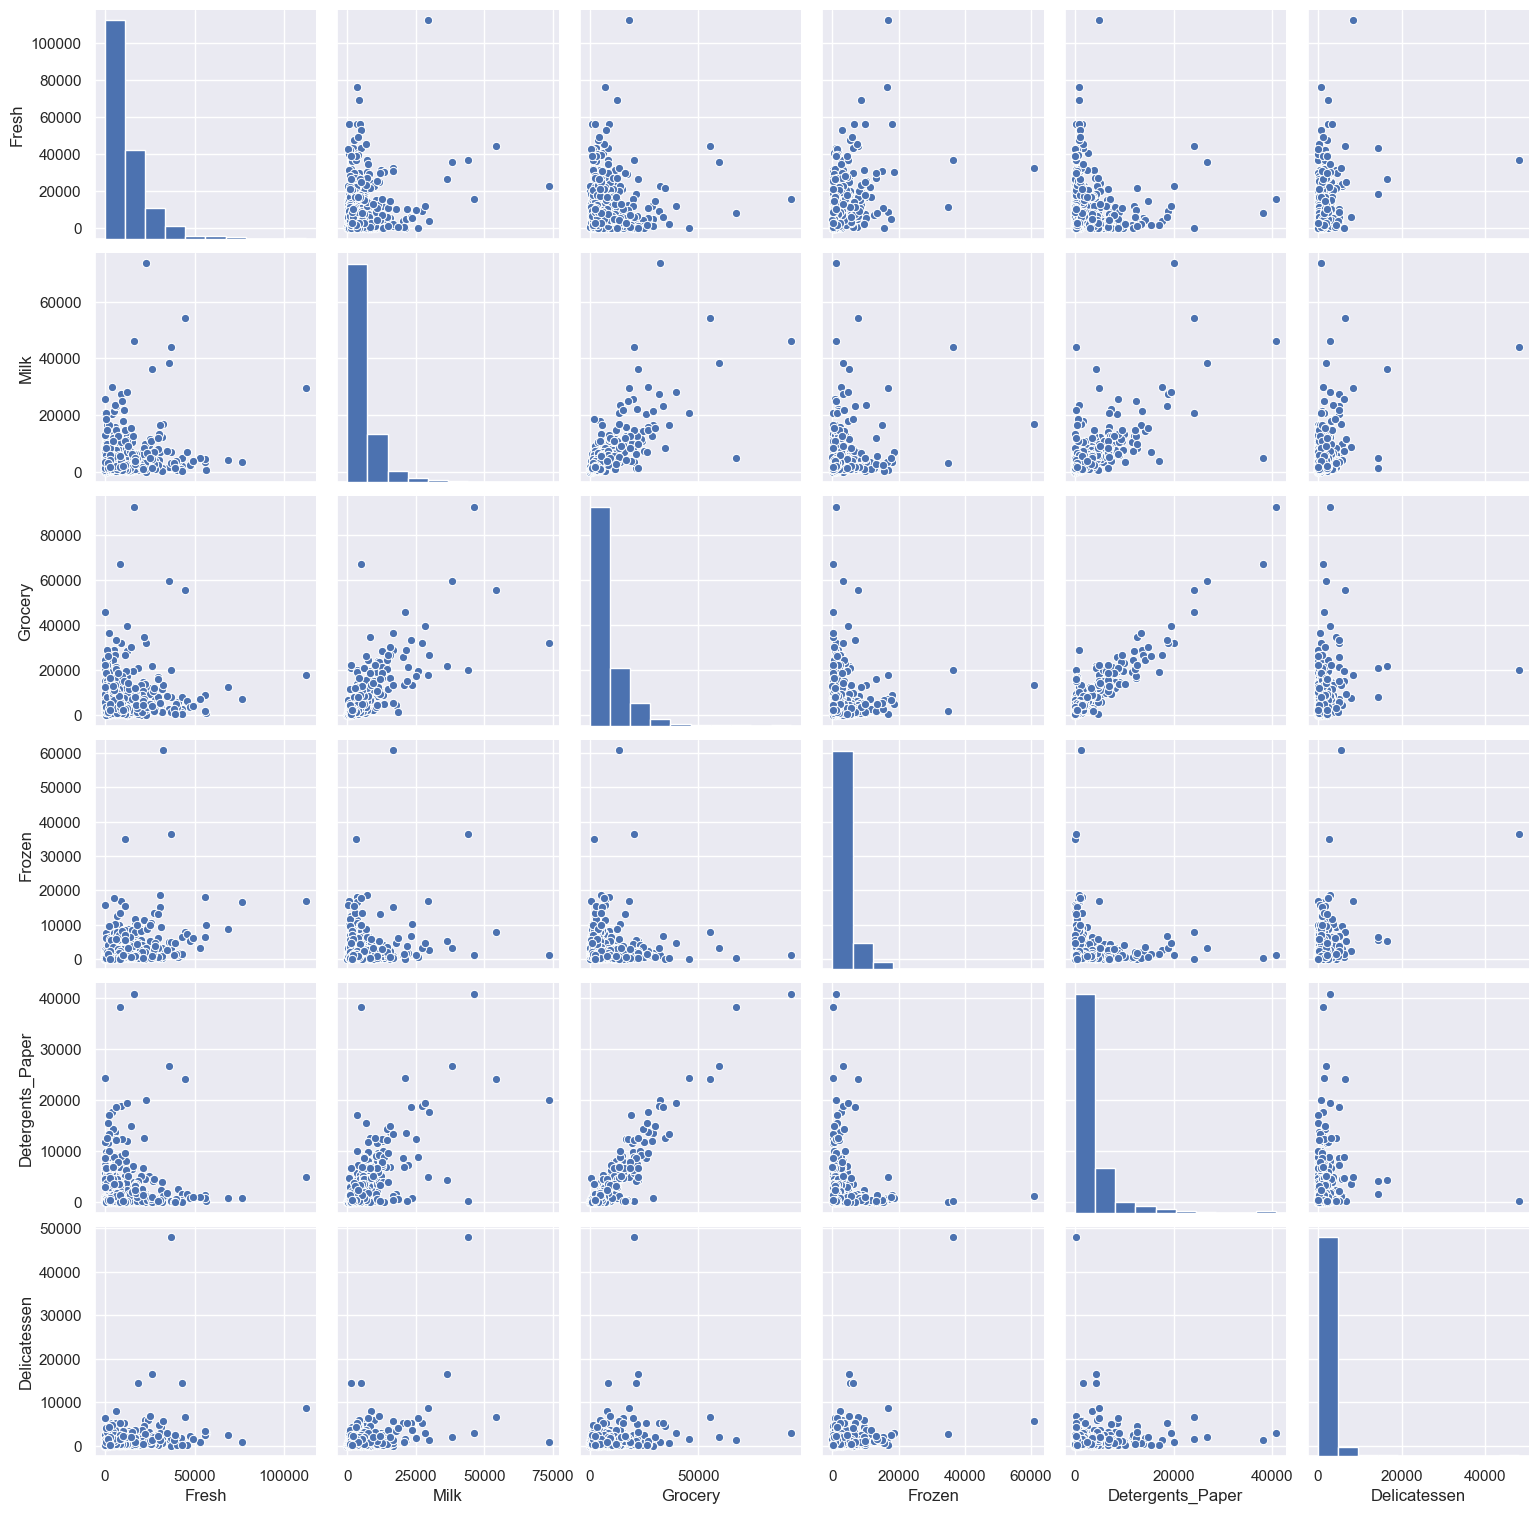

In [68]:
sns.pairplot(bdf)

In [20]:
sd=bdf.std()
sddf=sd.to_frame()
sddf=sddf.rename (columns={0:"standard_devation "})
sddf['mean'] = bdf.mean()

sddf

,standard_devation,mean
Fresh,12647.328865,12000.297727
Milk,7380.377175,5796.265909
Grocery,9503.162829,7951.277273
Frozen,4854.673333,3071.931818
Detergents_Paper,4767.854448,2881.493182
Delicatessen,2820.105937,1524.870455


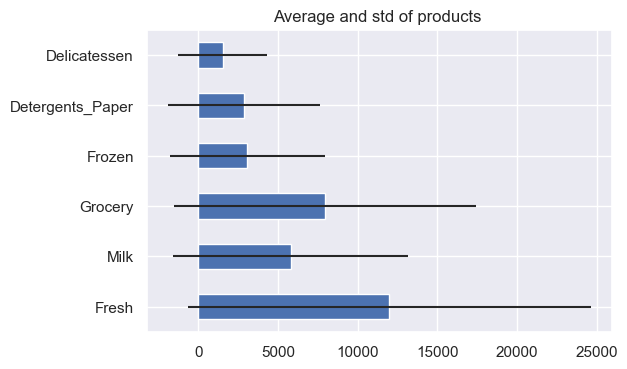

In [69]:
sddf.plot(kind = "barh", y = "mean", legend = False, title = "Average and std of products ", xerr = "standard_devation ")

### A high standard deviation shows that the data is widely spread (less reliable) and a low standard deviation shows that the data are clustered closely around the mean
### Based on the above analysis Fresh variety has most  inconsistent behiviour and Delicateseen has least inconsistent behiviour.

# 1.4 Are there any outliers in the data?

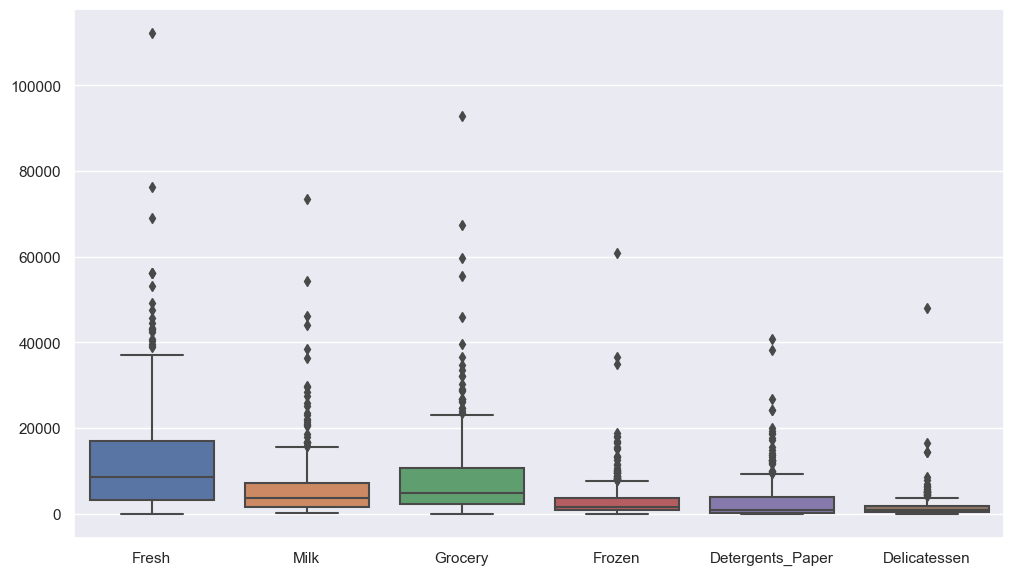

In [70]:
plt.figure(figsize=(12,7))
bx=sns.boxplot(data=bdf)


### yes there are outliners in the data. From the above analysis we can find that all the 6 producrts have outliers

# 1.5 On the basis of this report, what are the recommendations?

### Based on a channel and region anlysis . My recommedation to the wholesale distributor is to improve the sales in  Oporto  and Lisbo region . 
### Based on the product analysis , we can find out that Fresh and Frozen products are sold more to the Hotels  and Grocery and milk are sold more to the retail channel .So The distributor may use this information to optimise their marketing  techniques and it may boost the sales . 
### Based on the reginal behiviour analysis ,  The show simliar behivour on the all the region . ButThere are more outlier in the Other region than in the Oporto  and Lisbo region . Require further data collection and analysis on these outlier to find the reason .
### Based on the outlier analysis  on the products , all products have outliers . But Fresh items has a extreme Outlier .

# problem 2 

Problem 2 :
2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major
2.1.2. Gender and Grad Intention
2.1.3. Gender and Employment
2.1.4. Gender and Computer
 

2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

2.2.1. What is the probability that a randomly selected CMSU student will be male?
What is the probability that a randomly selected CMSU student will be female?

2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
Find the conditional probability of intent to graduate, given that the student is a female.

2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.
 

2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
Justify your comment in each case.

In [23]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [24]:
df2.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [25]:
df1.isnull().values.any()

False

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Gender and Major

In [27]:
gm=pd.crosstab(df2["Gender"],df2["Major"],margins=True)
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


## 2.1.2. Gender and Grad Intention

In [28]:
ggi=pd.crosstab(df2["Gender"],df2["Grad Intention"],margins=True)
ggi

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


## 2.1.3. Gender and Employment

In [29]:
ge=pd.crosstab(df2["Gender"],df2["Employment"],margins=True)
ge

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


## 2.1.4. Gender and Computer

In [30]:
gc=pd.crosstab(df2["Gender"],df2["Computer"],margins=True)
gc

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [31]:

print("\033[1m" +' The probability that a randomly selected CMSU student will be male  = 29/62 =', 29/62 ,'ie', round((29/62)*100), '%' )

 The probability that a randomly selected CMSU student will be male  = 29/62 = 0.46774193548387094 ie 47 %


## What is the probability that a randomly selected CMSU student will be female?

In [32]:
print("\033[1m" +' The probability that a randomly selected CMSU student will be female =33/62 = ', 33/62 ,'ie', round((33/62)*100), '% ' )

 The probability that a randomly selected CMSU student will be female =33/62 =  0.532258064516129 ie 53 % 


## 2.2.2. Find the conditional probability of different majors among the male students in CMSU.

In [33]:
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [34]:
print ("\033[1m" +'probability of of having Accounting as a  major among the male students in CMSU is 4/29 =              ', 4/29 ,'ie', round((4/29)*100) ,'%')
print ("\033[1m" +'probability of of having CIS as a  major among the male students in CMSU is  1/29 =                    ', 1/29 , 'ie', round((1/29)*100) ,'%'  )
print ("\033[1m" +'probability of of having Economics/Finance as a  major among the male students in CMSU is 4/29 =       ', 4/29, 'ie', round((4/29)*100) ,'%')
print ("\033[1m" +'probability of of having International Business as a  major among the male students in CMSU is 2/29 =  ', 2/29 ,'ie', round((2/29)*100) , '%' )
print ("\033[1m" +'probability of of having Management as a  major among the male students in CMSU is  6/29 =             ', 6/29 ,'ie', round((6/29)*100) , '%')
print ("\033[1m" +'probability of of having Other as a  major among the male students in CMSU is  4/29 =                  ', 4/29 , 'ie', round((4/29)*100) ,'%' )
print ("\033[1m" +'probability of of having Retail/Marketing  as a  major among the male students in CMSU is 5/29=        ',5/29 , 'ie', round((5/29)*100) ,'%' )
print ("\033[1m" +'probability of of having Undecided major among the male students in CMSU is 3/29  =                    ', 3/29 , 'ie', round((3/29)*100) ,'%' )

probability of of having Accounting as a  major among the male students in CMSU is 4/29 =               0.13793103448275862 ie 14 %
probability of of having CIS as a  major among the male students in CMSU is  1/29 =                     0.034482758620689655 ie 3 %
probability of of having Economics/Finance as a  major among the male students in CMSU is 4/29 =        0.13793103448275862 ie 14 %
probability of of having International Business as a  major among the male students in CMSU is 2/29 =   0.06896551724137931 ie 7 %
probability of of having Management as a  major among the male students in CMSU is  6/29 =              0.20689655172413793 ie 21 %
probability of of having Other as a  major among the male students in CMSU is  4/29 =                   0.13793103448275862 ie 14 %
probability of of having Retail/Marketing  as a  major among the male students in CMSU is 5/29=         0.1724137931034483 ie 17 %
probability of of having Undecided major among the male students in CMSU is 3/

## Find the conditional probability of different majors among the female students of CMSU.

In [35]:
print ("\033[1m" +'probability of of having Accounting as a  major among the female students in CMSU is 3/33=              ',  3/33    ,'ie', round((3/33)*100) ,'%')
print ("\033[1m" +'probability of of having CIS as a  major among the female students in CMSU is 3/33 =                    ',  3/33    ,'ie', round((3/33)*100) ,'%'  )
print ("\033[1m" +'probability of of having Economics/Finance as a  major among the female students in CMSU is 7/33=       ',  7/33    ,'ie', round((7/33)*100) ,'%')
print ("\033[1m" +'probability of of having International Business as a  major among the female students in CMSU is 4/33 = ',  4/33    ,'ie', round((4/33)*100) , '%' )
print ("\033[1m" +'probability of of having Management as a  major among the female students in CMSU is  4/33 =            ',  4/33    ,'ie', round((4/33)*100) , '%')
print ("\033[1m" +'probability of of having Other as a  major among the female students in CMSU is  3/33 =                 ',  3/33    ,'ie', round((3/33)*100) ,'%' )
print ("\033[1m" +'probability of of having Retail/Marketing  as a  major among the female students in CMSU is 9/33 =      ' , 9/33    ,'ie', round((9/33)*100) ,'%' )
print ("\033[1m" +'probability of of having Undecided major among the female students in CMSU is 0/33=                     ',  0/33    ,'ie', round((0/33)*100) ,'%' )

probability of of having Accounting as a  major among the female students in CMSU is 3/33=               0.09090909090909091 ie 9 %
probability of of having CIS as a  major among the female students in CMSU is 3/33 =                     0.09090909090909091 ie 9 %
probability of of having Economics/Finance as a  major among the female students in CMSU is 7/33=        0.21212121212121213 ie 21 %
probability of of having International Business as a  major among the female students in CMSU is 4/33 =  0.12121212121212122 ie 12 %
probability of of having Management as a  major among the female students in CMSU is  4/33 =             0.12121212121212122 ie 12 %
probability of of having Other as a  major among the female students in CMSU is  3/33 =                  0.09090909090909091 ie 9 %
probability of of having Retail/Marketing  as a  major among the female students in CMSU is 9/33 =       0.2727272727272727 ie 27 %
probability of of having Undecided major among the female students in CMS

## 2.2.3 Find the conditional probability of intent to graduate, given that the student is a male.

In [36]:
ggi

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [37]:
print ("\033[1m" +'probability of intent to graduate, given that the student is a male is 17/29 =  ', 17/29 ,'ie', round((17/29)*100) ,'%')

probability of intent to graduate, given that the student is a male is 17/29 =   0.5862068965517241 ie 59 %


## Find the conditional probability of intent to graduate, given that the student is a female.

In [38]:
print ("\033[1m" +'probability of intent to graduate, given that the student is a female is 11/33 = ', 11/33 ,'ie', round((11/33)*100) ,'%')

probability of intent to graduate, given that the student is a female is 11/33 =  0.3333333333333333 ie 33 %


## 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [39]:
ge

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [40]:
print("\033[1m" + 'The probability of employment status for the male students')
print ("\033[1m" +' probability of Fulltime  employment status for the male students  is 7/29 =                                        ', 7/29 ,'ie', round((7/29)*100) ,'%')
print ("\033[1m" +' probability of part-time  employment status for the male students  is  19/29 =                                     ', 19/29 ,'ie', round((19/29)*100) ,'%')
print ("\033[1m" +' probability of Unemployed status for the male students  is 3/29=                                                    ', 3/29 ,'ie', round((3/29)*100) ,'%')
print ("\033[1m" +' probability of some type of (either Fulltime or part time ) employment status for the male students is  (19+7)/29 = ', (19+7)/29 ,'ie', round(((19+7)/29)*100) ,'%')

The probability of employment status for the male students
 probability of Fulltime  employment status for the male students  is 7/29 =                                         0.2413793103448276 ie 24 %
 probability of part-time  employment status for the male students  is  19/29 =                                      0.6551724137931034 ie 66 %
 probability of Unemployed status for the male students  is 3/29=                                                     0.10344827586206896 ie 10 %
 probability of some type of (either Fulltime or part time ) employment status for the male students is  (19+7)/29 =  0.896551724137931 ie 90 %


In [41]:
print("\033[1m" + 'The probability of employment status for the female students')
print ("\033[1m" +' probability of Fulltime  employment status for the female students  is 3/33 =                                        ', 3/33 ,'ie', round((3/33)*100) ,'%')
print ("\033[1m" +' probability of part-time  employment status for the female students  is 24/33 =                                      ', 24/33 ,'ie', round((24/33)*100) ,'%')
print ("\033[1m" +' probability of Unemployed status for the female students  is 6/33 =                                                   ', 6/33 ,'ie', round((6/33)*100) ,'%')
print ("\033[1m" +' probability of some type of (either Fulltime or part time ) employment status for the female students  is (24+3)/33 = ', (24+3)/33 ,'ie', round(((24+3)/29)*100) ,'%')

The probability of employment status for the female students
 probability of Fulltime  employment status for the female students  is 3/33 =                                         0.09090909090909091 ie 9 %
 probability of part-time  employment status for the female students  is 24/33 =                                       0.7272727272727273 ie 73 %
 probability of Unemployed status for the female students  is 6/33 =                                                    0.18181818181818182 ie 18 %
 probability of some type of (either Fulltime or part time ) employment status for the female students  is (24+3)/33 =  0.8181818181818182 ie 93 %


## 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [42]:
gc

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [43]:
print ("\033[1m" +' probability of laptop preference among the male students  is 26/29 =  ', 26/29 ,'ie', round((26/29)*100) ,'%')

 probability of laptop preference among the male students  is 26/29 =   0.896551724137931 ie 90 %


In [44]:
print ("\033[1m" +' probability of laptop preference among the female students  is 29/33 ', 29/33 ,'ie', round((29/33)*100) ,'%')

 probability of laptop preference among the female students  is 29/33  0.8787878787878788 ie 88 %


## 2.3.Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case.

### If Statistic >= Critical Value: significant result, reject null hypothesis ( accept Ha), dependent.
### If Statistic < Critical Value: not significant result, fail to reject null hypothesis (aceept H0), independent.



In [45]:
print ("gender and major ")
gm2=pd.crosstab(df2["Gender"],df2["Major"],margins=False)
gm2

gender and major 


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [46]:
print( " gender vs major ")

stat, p, dof, expected = chi2_contingency(gm2)
print('dof=%d' % dof)
print(expected)


prob = 0.95 
critical = chi2.ppf(prob, dof)
print("critical=",critical)
print ("Stat=", stat)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


 gender vs major 
dof=7
[[3.72580645 2.12903226 5.85483871 3.19354839 5.32258065 3.72580645
  7.4516129  1.59677419]
 [3.27419355 1.87096774 5.14516129 2.80645161 4.67741935 3.27419355
  6.5483871  1.40322581]]
critical= 14.067140449340169
Stat= 7.084844866036089
Independent (fail to reject H0)


In [47]:
print("gender and Grad grad Intention")
ggi2 =pd.crosstab(df2["Gender"],df2["Grad Intention"],margins=False)
ggi2

gender and Grad grad Intention


Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [48]:
print( " gender vs grad Intention  ")
stat, p, dof, expected = chi2_contingency(ggi2)
print('dof=%d' % dof)
print(expected)


prob = 0.95 
critical = chi2.ppf(prob, dof)
print("critical=",critical)
print ("Stat=", stat)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


 gender vs grad Intention  
dof=2
[[ 6.38709677 11.70967742 14.90322581]
 [ 5.61290323 10.29032258 13.09677419]]
critical= 5.991464547107979
Stat= 4.774796781066374
Independent (fail to reject H0)


In [49]:
print( " gender vs Employement status ")
ge2=pd.crosstab(df2["Gender"],df2["Employment"],margins=False)
ge

 gender vs Employement status 


Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [50]:
print( " gender vs Employement status ")
stat, p, dof, expected = chi2_contingency(ge2)
print('dof=%d' % dof)
print(expected)


prob = 0.95 
critical = chi2.ppf(prob, dof)
print("critical=",critical)
print ("Stat=", stat)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


 gender vs Employement status 
dof=2
[[ 5.32258065 22.88709677  4.79032258]
 [ 4.67741935 20.11290323  4.20967742]]
critical= 5.991464547107979
Stat= 2.9355495613715337
Independent (fail to reject H0)


In [51]:
print("gender vs Computer")
gc2=pd.crosstab(df2["Gender"],df2["Computer"],margins=False)
gc2

gender vs Computer


Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [52]:
print( " gender vs computer ")

stat, p, dof, expected = chi2_contingency(gc2)
print('dof=%d' % dof)
print(expected)


prob = 0.95 
critical = chi2.ppf(prob, dof)
print("critical=",critical)
print ("Stat=", stat)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

 gender vs computer 
dof=2
[[ 2.66129032 29.27419355  1.06451613]
 [ 2.33870968 25.72580645  0.93548387]]
critical= 5.991464547107979
Stat= 2.114372565783224
Independent (fail to reject H0)


### The critical value is calculated and interpreted for all the cases  , finding that indeed the  column variable in each case is independent of Gender (fail to reject H0) .

## 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

### p <= alpha: reject H0, not normal.
### p > alpha: fail to reject H0, normal.


In [53]:
alpha = 0.05
print ("alpha =", alpha )

alpha = 0.05


### Salary

In [54]:
stat, p = shapiro(df2['Salary'])
print("shapiro test for the variable Salary")
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (p< alpha reject H0)')


shapiro test for the variable Salary
Statistics=0.957, p=0.028
Sample does not look Gaussian (p< alpha reject H0)


Histogram (distrubution plot for varaible salary  )


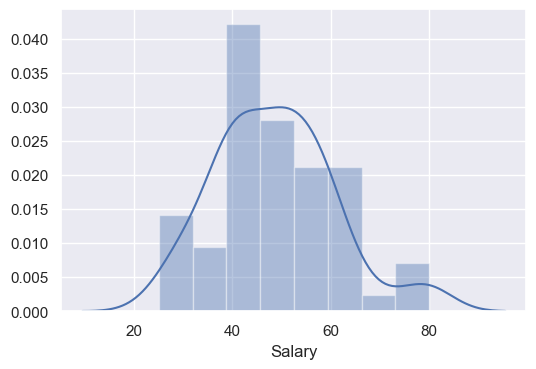

In [71]:
print("Histogram (distrubution plot for varaible salary  )")
sns.distplot(df2['Salary'])


In [56]:
print("D'Agostino's K^2 Test for variable salary ")
stat, p = normaltest(df2['Salary'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

D'Agostino's K^2 Test for variable salary 
Statistics=3.846, p=0.146
Sample looks Gaussian (fail to reject H0)


### Spending

In [57]:
stat, p = shapiro(df2['Spending'])
print("shapiro test for the variable Spending")
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


shapiro test for the variable Spending
Statistics=0.878, p=0.000
Sample does not look Gaussian (reject H0)


Histogram (distrubution plot for varaible spending )


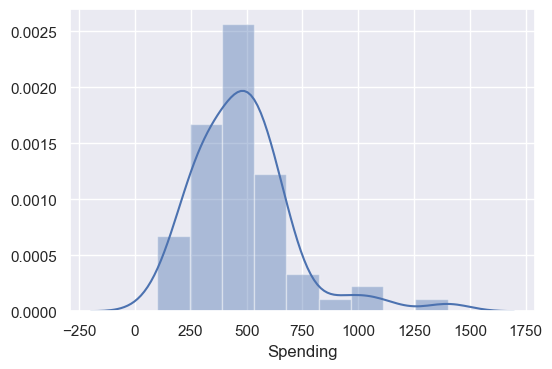

In [72]:
print("Histogram (distrubution plot for varaible spending )")
sns.distplot(df2['Spending'])

In [59]:
print("D'Agostino's K^2 Test for variable spending ")
stat, p = normaltest(df2['Spending'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

D'Agostino's K^2 Test for variable spending 
Statistics=30.496, p=0.000
Sample does not look Gaussian (reject H0)


### Text Messages

In [60]:
stat, p = shapiro(df2['Text Messages'])
print("shapiro test for the variable Text Messages")
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

shapiro test for the variable Text Messages
Statistics=0.859, p=0.000
Sample does not look Gaussian (reject H0)


Histogram (distrubution plot for varaible Text Messages )


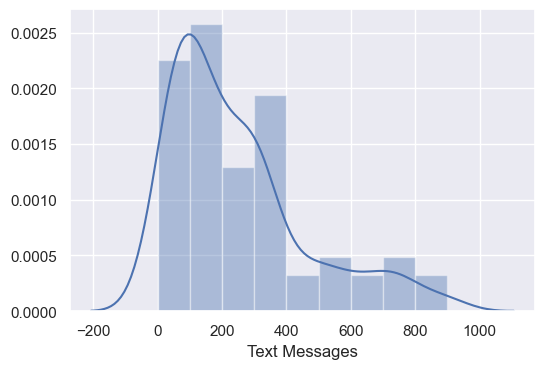

In [73]:
print("Histogram (distrubution plot for varaible Text Messages )")
sns.distplot(df2['Text Messages'])

In [62]:
print("D'Agostino's K^2 Test for variable Text Messages ")
stat, p = normaltest(df2['Text Messages'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

D'Agostino's K^2 Test for variable Text Messages 
Statistics=16.348, p=0.000
Sample does not look Gaussian (reject H0)


### From the above analysis , we can find that text messages and spending do not follow normal distribution .  Salary even though it does not look like gaussian in  the  shaprio test , In accordance with D'Agostino k squared test and distribution plot , it follows normal distribution . 

# problem 3

## s1- population mean moisture content in A shingles 

## s2- population mean moisture content in B shingles 

## 3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

##  Assumption :  we assume that both the populations are normally distributed and samples are random ( as both the sample A and B are above 30 picked randomely )also we assumed unequal variances of the populations. (population varaince unknown )

### Hypothesis
### H0 :S1 = s2
### H1: S1 is not equal to S2


In [63]:
alpha= 0.05
print("alpha =", alpha)

alpha = 0.05


In [64]:
t_statistic, p_value  = ttest_ind(df3['A'], df3.dropna()['B'])
print('tstat',t_statistic)    
print('P Value',p_value)

if p_value < alpha:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the  means for shingles A and B are  not equal .')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis (p > alpha)')
    print('We conclude that the  means for shingles A and B are equal.')

tstat 1.289628271966112
P Value 0.2017496571835328
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis (p > alpha)
We conclude that the  means for shingles A and B are equal.


## 3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

### for the above test ( Test ) , we must assume that both the  samples  are normally distributed and samples are random.  We also assumed unequal variances of the populations as variance of population is unknown . 

### Thank you